#Random Forest

The name gives it away !!

It's a forest. Forest has many trees.

So naturally this model utilizes many Decision Trees.

But other than the intelligent use of language, what is special(or should I say random) about these "Random Forests" and why do we use them?

We know from last class that Decision Trees are prone to overfitting.

Decision Tree, although being simple and intutive, are not very effective in general. It focuses on the current node-split and not the effect on the whole tree as such. This behaviour is prone to overfitting.

So now one solution to this could be to create different trees to bring in some amount of generalizability. But now we can't be having same parameters for each tree and give them same dataset. Because in that case we will end up with exactly same tree.

This is where the "Random" in the name comes.

So now these different trees provide us with different views/perspective on the dataset. This collective learning will lead us to generalization.

Ok so now the first goal is clear, get different trees. How??

For each tree we give different dataset and different features



##Randomizing the features

We know that even decision trees don't always use all the features. So it might miss out on some feature(s) that could be key to understand the dataset better.

in Random Forest, for each of the tree, at each split, it will randomize the set of features that it would consider. This way all the features have a chance.

##Bagging

Random Forest uses bagging concept.

Now what is this?

###Bootstrap + Aggregating

Bootstrap:
Randomizing the input data

For each decision tree, our input data will be different and randomized. So it means we create multiple random datasets by resampling from the original dataset. So, for a tree, our dataset will be formed by sampling randomly from the original dataset with replacement. (What??)

The new dataset will have same number of rows as the original, so we can have repeating rows.

Bootstraping + Feature randomization ensures that we get different trees.

These two are the core of Random Forest. This helps in overcoming the issue of overfitting in decision trees.

Aggregating:

We have many trees now. Lets say we have completed the training part. Now what? We have results from each of the tree. How to get the final result with these??

For regression: Average

For classification: Voting



In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset.csv")
df.reset_index(drop=True, inplace=True)
df = df.dropna()
columns = (df.drop(["sex"],axis=1)).columns
X = df.drop(["sex"],axis=1).to_numpy()
y = df["sex"].to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, random_state=7)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=7)

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred,pos_label='f'))

Accuracy: 0.6666666666666666
F1 score: 0.5333333333333333


We can also get probabilities

In [ ]:
y_pred_prob = model.predict_proba(X_test)
print(model.classes_)
print(y_pred_prob)

['f' 'm']
[[0.28 0.72]
 [0.38 0.62]
 [0.46 0.54]
 [0.3  0.7 ]
 [0.56 0.44]
 [0.62 0.38]
 [0.42 0.58]
 [0.58 0.42]
 [0.44 0.56]
 [0.54 0.46]
 [0.4  0.6 ]
 [0.62 0.38]
 [0.12 0.88]
 [0.46 0.54]
 [0.22 0.78]
 [0.32 0.68]
 [0.56 0.44]
 [0.58 0.42]
 [0.48 0.52]
 [0.46 0.54]
 [0.1  0.9 ]]


Random forest also gives us feature importance

In [ ]:
ft_imp = model.feature_importances_
for i in range(len(columns)):
  print(columns[i], ":", ft_imp[i])

age : 0.04089882096919505
hdlngth : 0.1540552461379076
skullw : 0.09079949136070485
totlngth : 0.10135543617843049
taill : 0.09419633100235507
footlgth : 0.12320007296488374
earconch : 0.08766816271084943
eye : 0.1262065600962883
chest : 0.09279628862557043
belly : 0.08882358995381497


Does increasing number of trees give better results?

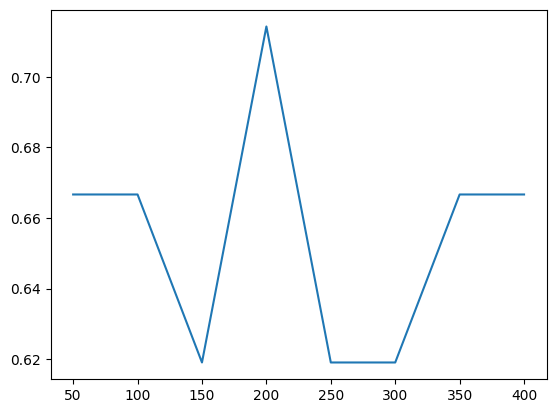

In [ ]:
scores = []
# scores.append(accuracy_score(y_test,y_pred))
num_trees = [50, 100, 150, 200, 250, 300, 350, 400]
for n in num_trees:
  model = RandomForestClassifier(n_estimators=n, random_state=7)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

import matplotlib.pyplot as plt

plt.plot(num_trees, scores)
plt.show()

Now lets learn a little about some of the many parameters of RandomForestClassifier

[Random Forest Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

OOB score

There is no necessity of test error for random forest. Why?

As for any tree we are not goind to use the whole dataset, the part that was not used. So we can train the random forest model with the whole dataset.

Random forest gives us the Out-of-Bag error. This error is calculated using the datapoints that were not used by that particular tree.

In wikipedia's words: OOB error is the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample.

sklearn also allows us to use OOB as a metric to measure the mode, instead of default accuracy score.

Can you tell how to do that?

We just went through the parameters of Random Forest, use them.

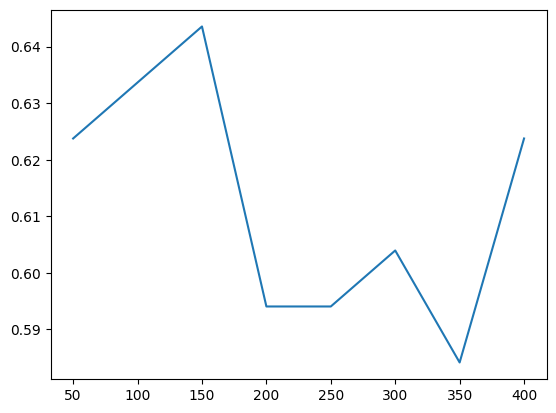

In [ ]:
scores = []
# scores.append(accuracy_score(y_test,y_pred))
num_trees = [50, 100, 150, 200, 250, 300, 350, 400]
for n in num_trees:
  model = RandomForestClassifier(n_estimators=n, random_state=7, oob_score=True)
  model.fit(X, y)
  # y_pred = model.predict(X_test)
  scores.append(model.oob_score_)

import matplotlib.pyplot as plt

plt.plot(num_trees, scores)
plt.show()